Sales Summary:
  product  total_qty  revenue
0   Apple         15      7.5
1  Banana         30      9.0
2  Orange         20     14.0


<Figure size 800x500 with 0 Axes>

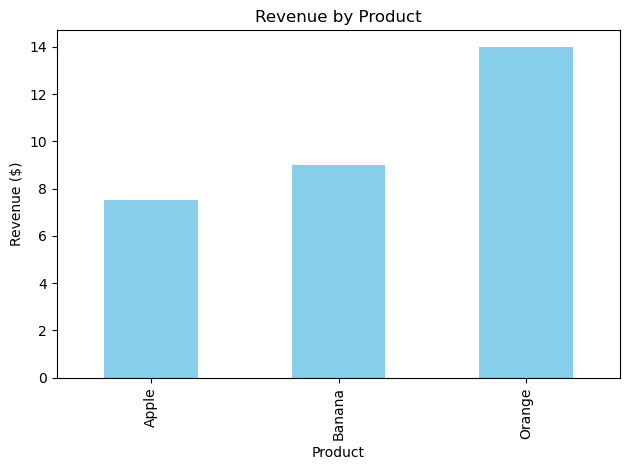

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os

# Step 1: Create or connect to SQLite database
db_path = "sales_data.db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Step 2: Create a simple sales table (if it doesn't exist)
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Step 3: Insert some dummy data (only if table is empty)
cursor.execute("SELECT COUNT(*) FROM sales")
if cursor.fetchone()[0] == 0:
    sample_data = [
        ('Apple', 10, 0.5),
        ('Banana', 20, 0.3),
        ('Apple', 5, 0.5),
        ('Orange', 15, 0.7),
        ('Banana', 10, 0.3),
        ('Orange', 5, 0.7)
    ]
    cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
    conn.commit()

# Step 4: Run SQL query to get total quantity and revenue by product
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

df = pd.read_sql_query(query, conn)

# Step 5: Print the results
print("Sales Summary:")
print(df)

# Step 6: Plot a simple bar chart for revenue by product
plt.figure(figsize=(8, 5))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

# Step 7: Close the database connection
conn.close()
